<a href="https://colab.research.google.com/github/ThiagoAdriano1/Amazon-Products-Sales-Monitor-Dataset/blob/main/Notebook_Precipitacao_Brasilia_2014_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Precipitação de Chuva em Brasília entre 2020 e 2023***

Análise de dados sobre a precipitação de chuva em Brasília entre os anos 2020 e 2023.

Base de dados retirada do Portal INMET.
https://portal.inmet.gov.br/dadoshistoricos

Por Felipe Santos, Gedson Silva, Gustavo Igor, Lilian Santos e Thiago Adriano.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho para o arquivo .csv no Google Drive
csv_path = '/content/drive/MyDrive/Trabalho_Estatistica/Dataset_Brasilia/Brasilia_2014_a_2023.csv'

Mounted at /content/drive


In [3]:
# Ler o arquivo .csv usando o Pandas
df = pd.read_csv(csv_path, encoding='UTF-8', sep=';')
df

,cidade,data,hora_utc,precipitacao_total,pressao_atmosferica,pressao_max_anterior,pressao_min_anterior,radiacao_global,temperatura_ar,temperatura_orvalho,temperatura_max_anterior,temperatura_min_anterior,orvalho_max_anterior,orvalho_min_anterior,umidade_rel_max_anterior,umidade_rel_min_anterior,umidade_relativa,direcao_vento,rajada_maxima,velocidade_vento
0,Brasilia,01/01/2014,00:00,0.0,885.8,885.9,885.4,-9999.0,21.2,18.0,22.2,21.0,18.3,17.6,83.0,77.0,82.0,173.0,2.1,0.8
1,Brasilia,01/01/2014,01:00,0.0,886.6,886.6,885.8,-9999.0,20.3,18.9,21.2,20.1,19.0,17.7,92.0,82.0,91.0,167.0,1.4,0.4
2,Brasilia,01/01/2014,02:00,0.0,887.0,887.0,886.6,-9999.0,19.9,18.5,20.4,19.7,18.8,18.2,93.0,90.0,91.0,187.0,1.4,0.6
3,Brasilia,01/01/2014,03:00,0.0,886.5,887.0,886.5,-9999.0,19.9,18.2,20.1,19.6,18.5,18.0,92.0,88.0,90.0,120.0,1.2,0.5
4,Brasilia,01/01/2014,04:00,0.0,886.2,886.5,886.2,-9999.0,19.4,18.5,20.1,19.1,18.8,17.9,96.0,88.0,95.0,124.0,0.6,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,Brasilia,31/12/2023,1900 UTC,0.0,884.2,885.2,884.2,1252.2,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1
87644,Brasilia,31/12/2023,2000 UTC,0.0,883.7,884.3,883.7,1178.8,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9
87645,Brasilia,31/12/2023,2100 UTC,0.0,883.5,883.7,883.4,873.0,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7
87646,Brasilia,31/12/2023,2200 UTC,0.0,884.5,884.5,883.5,104.0,23.4,18.2,25.5,23.4,18.2,17.4,72.0,61.0,72.0,293.0,4.8,2.0


### Exploração dos Dados

#### Abaixo estão especificadas as colunas existentes neste arquivo.

In [ ]:
df.columns

Index(['cidade', 'data', 'hora_utc', 'precipitacao_total',
       'pressao_atmosferica', 'pressao_max_anterior', 'pressao_min_anterior',
       'radiacao_global', 'temperatura_ar', 'temperatura_orvalho',
       'temperatura_max_anterior', 'temperatura_min_anterior',
       'orvalho_max_anterior', 'orvalho_min_anterior',
       'umidade_rel_max_anterior', 'umidade_rel_min_anterior',
       'umidade_relativa', 'direcao_vento', 'rajada_maxima',
       'velocidade_vento'],
      dtype='object')

#### Seleção das colunas a serem analisadas.

In [ ]:
df = df[['data','hora_utc', 'precipitacao_total']]

#### Visualização rápida das primeiras linhas do DataFrame.

In [ ]:
df.head()

,data,hora_utc,precipitacao_total
0,01/01/2014,00:00,0.0
1,01/01/2014,01:00,0.0
2,01/01/2014,02:00,0.0
3,01/01/2014,03:00,0.0
4,01/01/2014,04:00,0.0


#### Verificação dos tipos dos dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data                87648 non-null  object 
 1   hora_utc            87648 non-null  object 
 2   precipitacao_total  87561 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
#Convertendo a data
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

<ipython-input-163-9090917256a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')


In [ ]:
#Adicionando colunas para mes e ano
df.loc[:,'mes'] = df['data'].dt.to_period('M')
df.loc[:,'ano'] = df['data'].dt.year

<ipython-input-164-231398f9a3d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'mes'] = df['data'].dt.to_period('M')
<ipython-input-164-231398f9a3d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ano'] = df['data'].dt.year


In [ ]:
#Variavel com os anos para utilizar nos gráficos
anos_bsb = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

### Análise dos Dados

#### 1. Precipitação média anual em Brasília.

In [ ]:
#Obtendo a média anual
medias_bsb = df.groupby(pd.Grouper(key='data', freq='Y'))['precipitacao_total'].mean()

<ipython-input-166-cc63c7eb1849>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  medias_bsb = df.groupby(pd.Grouper(key='data', freq='Y'))['precipitacao_total'].mean()


In [ ]:
medias_bsb

,precipitacao_total
data,
2014-12-31,0.168356
2015-12-31,0.124368
2016-12-31,0.129887
2017-12-31,0.147489
2018-12-31,0.195363
2019-12-31,0.156610
2020-12-31,0.179485
2021-12-31,0.230985
2022-12-31,0.154858


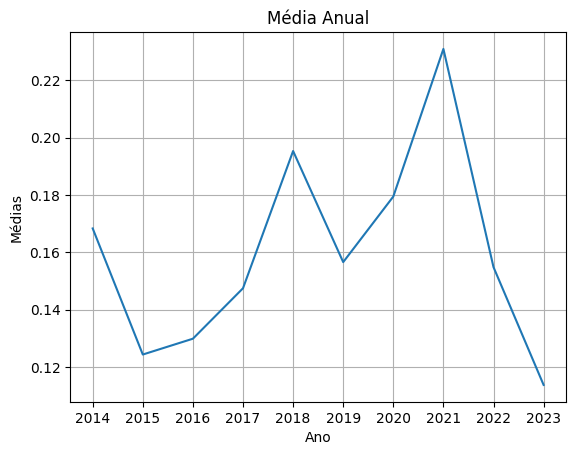

In [ ]:
plt.plot(anos_bsb, medias_bsb)
plt.xlabel('Ano')
plt.ylabel('Médias')
plt.title('Média Anual')
plt.grid(True)
plt.show()

#### 2. Análise da variação na precipitação ao longo dos anos.

In [ ]:
#Calculando o desvio padrão da médias
desvio_padrao_bsb = np.std(medias_bsb)
print("Desvio padrão das médias: ", desvio_padrao_bsb)

#Calculando o coeficiente de variação (interessante para ver a dispersão dos dados)
media_medias_bsb = np.mean(medias_bsb)
coeficiente_variacao = desvio_padrao_bsb / media_medias_bsb
print("Coeficiente de variação: ", coeficiente_variacao)

Desvio padrão das médias:  0.03353726000890211
Coeficiente de variação:  0.20945532205022246


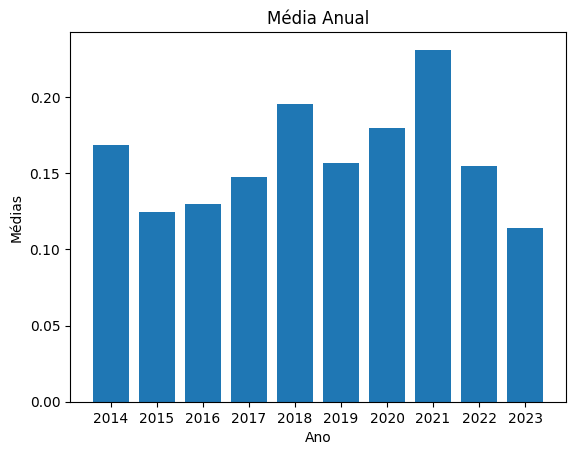

In [ ]:
plt.bar(anos_bsb, medias_bsb)
plt.xlabel('Ano')
plt.ylabel('Médias')
plt.title('Média Anual')
plt.show()

Nos anos analisados, foi calculada uma variação média na precipitação de 0.25 mm/h. Podemos concluir que a baixa precipitação no ano de 2023 influenciou bastante nessa variancia.

#### 3. Anos com os maiores e menores volumes de chuva em média.

In [ ]:
df_ano =df['precipitacao_total'].sum()

In [ ]:
df_ano.sort_values(ascending=False)

,precipitacao_total
ano,
2021,2023.2
2018,1702.0
2020,1576.6
2014,1474.8
2019,1369.4
2022,1356.4
2017,1292.0
2016,1140.8
2015,1087.6


In [ ]:
df_mes = df.groupby('mes')['precipitacao_total'].sum()

In [ ]:
df_mes.sort_values(ascending=False).head(20)

,precipitacao_total
mes,
2021-02,539.4
2022-11,428.4
2021-12,391.0
2016-01,345.0
2021-11,341.8
2017-11,333.8
2022-12,323.2
2014-12,321.0
2019-04,320.2


#### 4. Mediana da precipitação e verificação de outliers.

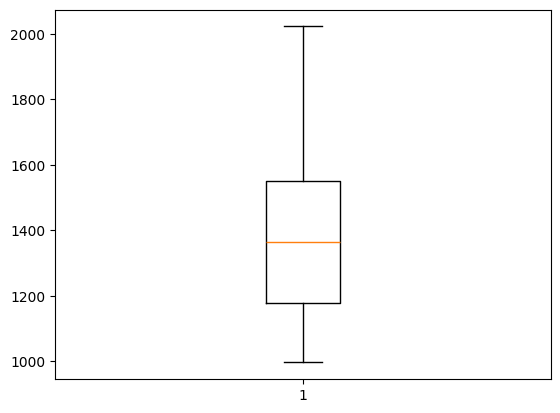

In [ ]:
plt.boxplot(x = df_ano)
plt.show()

In [ ]:
df_ano.median()

1362.9

In [ ]:
todas_precipitacao = df['precipitacao_total']
todas_datas = df['data']

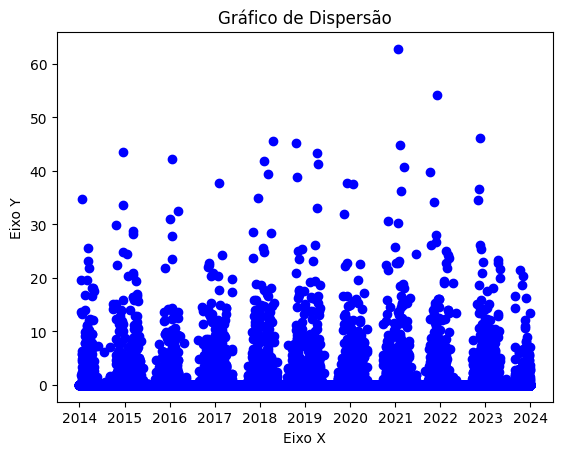

In [ ]:
# Criar o gráfico de dispersão
plt.scatter(todas_datas, todas_precipitacao, color='blue')

# Adicionar títulos e rótulos
plt.title('Gráfico de Dispersão')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Exibir o gráfico
plt.show()

Não possui pontos de outlier, pois o valor de máximo não ultrapassa o 3º quartil em 1.5 vezes. E o valor minímo também não está abaixo do 1º quartil em 1.5 vezes.

#### 5. Verificação da tendência de aumento ou redução da precipitação ao longo do tempo.

<ipython-input-283-183f29c38cfd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='ano', y='precipitacao_total', marker='o', label='Precipitação Anual', color='blue', ci=None)


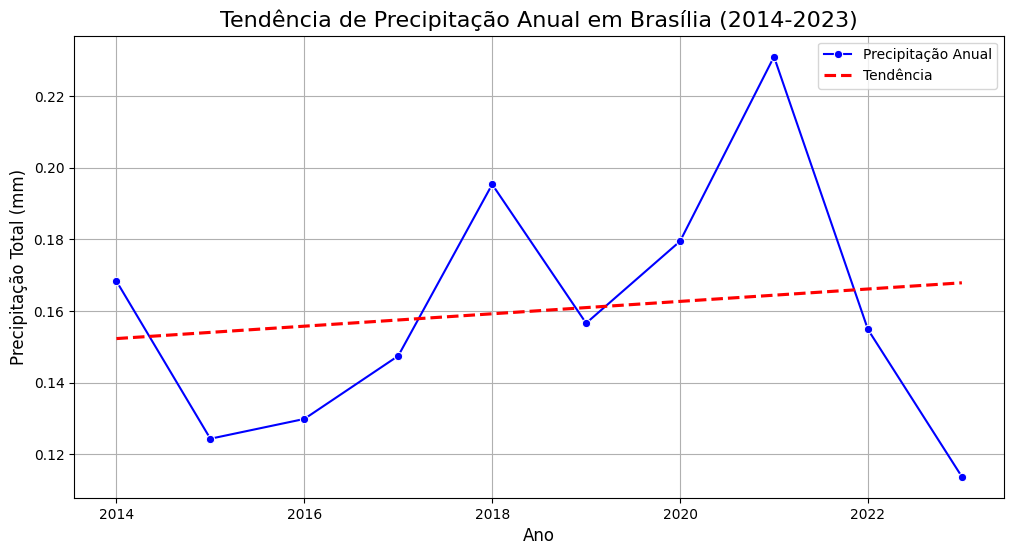

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ano', y='precipitacao_total', marker='o', label='Precipitação Anual', color='blue', ci=None)
#Linha de tendência
sns.regplot(data=df, x='ano', y='precipitacao_total',line_kws={'color':'red', 'linestyle':'--'}, scatter=False, label='Tendência', ci=None)

plt.title('Tendência de Precipitação Anual em Brasília (2014-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### 6. Anos em que a variabilidade de precipitação (desvio padrão) é maior.

In [ ]:
#Calculando o desvio padrão dos anos
dados_agrupados = df.groupby('ano')['precipitacao_total'].agg(['std'])

In [ ]:
dados_agrupados.sort_values(by='std', ascending=False)

,std
ano,
2021,1.900235
2018,1.632937
2019,1.439966
2014,1.395298
2022,1.390246
2017,1.232794
2016,1.216593
2020,1.188197
2015,1.084391
